<a href="https://colab.research.google.com/github/harishvo6/Music-recommendation-system/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Music Recommendation System**

### **Importing Libraries and the Dataset**

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install numpy==1.26.4


In [4]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                             # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary that does not raise a key error

from sklearn.metrics.pairwise import cosine_similarity # To find the similarity between two vectors

from sklearn.metrics import mean_squared_error  # A performance metric in sklearn

### **Load the dataset**

In [5]:
#importing the datasets
count_df = pd.read_csv('/content/drive/MyDrive/Python Course/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/Python Course/song_data.csv')

### **Understanding the data by viewing a few observations**

In [6]:
# Display the first 10 records of count_df
count_df.head(10)


,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [7]:
# Display the first 10 records of song_df
song_df.head(10)


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [8]:
# Display the info of count_df
count_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
# Display the info of song_df
song_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:_____________**


In [10]:
# Left merge count_df and song_df on "song_id". Drop duplicates from song_df data simultaneously

# Drop the column 'Unnamed: 0'

df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


In [11]:
df.nunique()

,0
user_id,76353
song_id,10000
play_count,295
title,9567
release,5388
artist_name,3375
year,58


**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [12]:
# Apply label encoding for "user_id" and "song_id"
# Label encoding code
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])


**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

In [13]:
# Get the column containing the users
users = df.user_id

# Create a dictionary that maps users(listeners) to the number of songs that they have listened to
playing_count = dict()

for user in users:
    # If we already have the user, just add 1 to their playing count
    if user in playing_count:
        playing_count[user] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[user] = 1

In [14]:
# We want our users to have listened at least 90 songs
SONG_COUNT_CUTOFF = 90

# Create a list of users who need to be removed
remove_users = []

for user, num_songs in playing_count.items():

    if num_songs < SONG_COUNT_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [15]:
# Get the column containing the songs
songs = df.song_id

# Create a dictionary that maps songs to its number of users(listeners)
playing_count = dict()

for song in songs:
    # If we already have the song, just add 1 to their playing count
    if song in playing_count:
        playing_count[song] += 1

    # Otherwise, set their playing count to 1
    else:
        playing_count[song] = 1

In [16]:
# We want our song to be listened by atleast 120 users to be considred
LISTENER_COUNT_CUTOFF = 120

remove_songs = []

for song, num_users in playing_count.items():
    if num_users < LISTENER_COUNT_CUTOFF:
        remove_songs.append(song)

df_final= df.loc[ ~ df.song_id.isin(remove_songs)]

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs.

In [17]:
# Keep only records of songs with play_count less than or equal to (<=) 5
df_final = df_final.loc[df_final.play_count <= 5]

In [18]:
# Check the shape of the data
df_final.shape
df_final

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117876 entries, 200 to 1999765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      117876 non-null  int64 
 1   song_id      117876 non-null  int64 
 2   play_count   117876 non-null  int64 
 3   title        117876 non-null  object
 4   release      117876 non-null  object
 5   artist_name  117876 non-null  object
 6   year         117876 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 7.2+ MB


In [20]:
df_final['year'].value_counts()

,count
year,
0,20649
2009,16351
2008,14031
2007,13750
2003,7928
2006,7592
2005,5376
2002,5135
2000,4834


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [21]:
# Display total number of unique user_id
df_final.user_id.nunique()


3155

Total number of unique song id

In [22]:
# Display total number of unique song_id
df_final.song_id.nunique()


563

Total number of unique artists

In [23]:
# Display total number of unique artists
df_final.artist_name.nunique()


232

### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [24]:
# Most interacted songs
# Count how many users listened to each song
most_interacted_songs = df_final.groupby('song_id')['user_id'].nunique().sort_values(ascending=False)

# Display top N songs (e.g., top 10)
print("Top 10 Most Interacted Songs:")
print(most_interacted_songs.head(10))


Top 10 Most Interacted Songs:
song_id
8582    751
352     748
2220    713
1118    662
4152    652
5531    618
4448    609
6189    606
6293    583
1334    570
Name: user_id, dtype: int64


Most interacted users

In [25]:
# Count how many songs listened by user
most_interacted_users = df_final.groupby('user_id')['song_id'].nunique().sort_values(ascending=False)

# Display top N songs (e.g., top 10)
print("Top 10 Most Interacted User:")
print(most_interacted_users.head(10))

Top 10 Most Interacted User:
user_id
61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
9097     175
26616    175
43041    174
65994    171
Name: song_id, dtype: int64


Songs released on yearly basis

In [26]:
#Songs released on yearly basis
df_final.groupby('year')['song_id'].nunique()


,song_id
year,
0,85
1969,2
1970,1
1971,1
1973,1
1974,2
1975,1
1976,2
1978,1


In [27]:
# count of the songs in an year using the title count
# count of the songs in an year using the title count
count_songs = song_df.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace = True)
count

,title
year,
1922,6
1924,5
1925,7
1926,19
1927,43
...,...
2007,39414
2008,34770
2009,31051


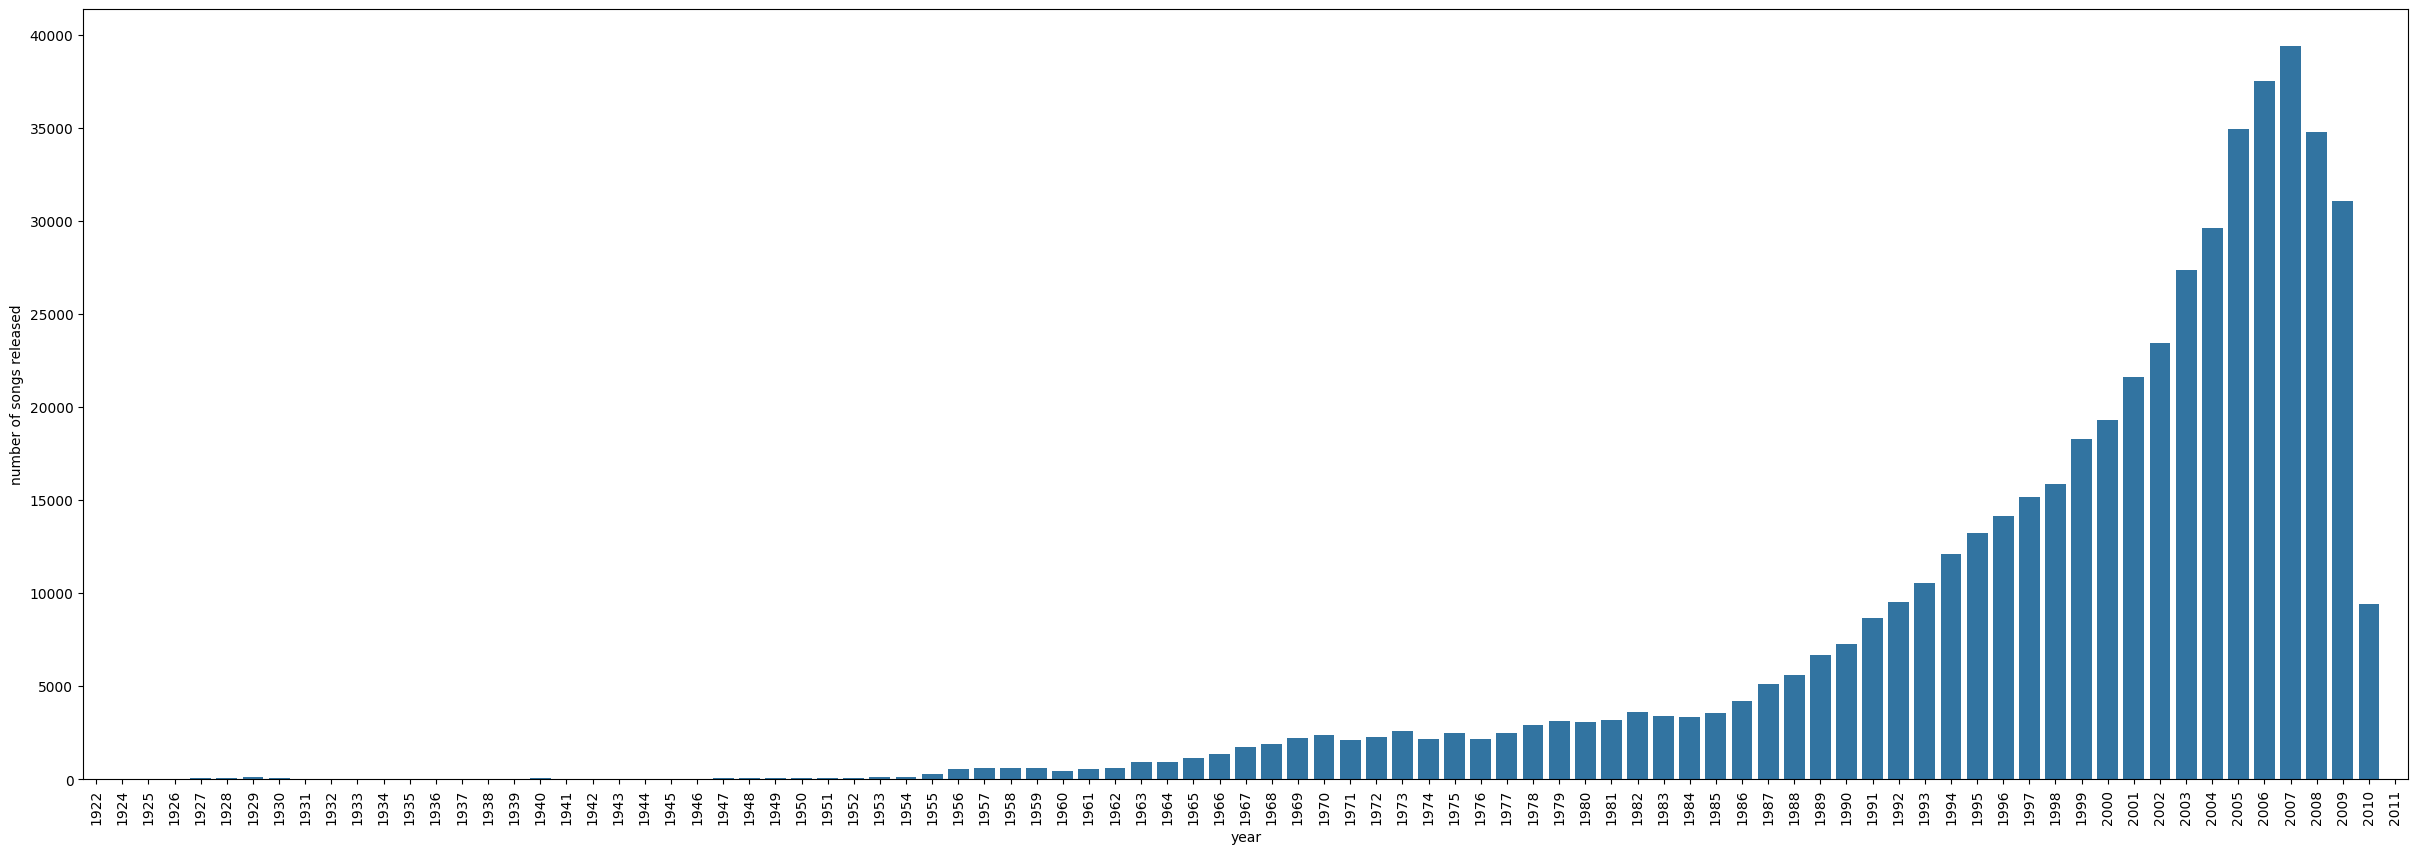

In [28]:
plt.figure(figsize = (30,10))
ax = sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median,)
for item in ax.get_xticklabels(): item.set_rotation(90)
plt.ylabel('number of songs released')
# Show the plot
plt.show()

#### **Observations and Insights:__________** #

**Think About It:** What other insights can be drawn using exploratory data analysis?

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

## Building various models

In [29]:
df_final.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [30]:
# Calculating average play_count
average_count = df_final.groupby('song_id')['play_count'].mean()

# Calculating the frequency a song is played
play_freq = df_final.groupby('song_id').size()

In [31]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

# Resetting the index to make song_id a column
final_play = final_play.reset_index()

# Setting song_id as index
final_play = final_play.set_index('song_id')

# Sorting the dataframe in descending order
final_play = final_play.sort_values(['play_freq', 'avg_count'], ascending = False)

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
8582,1.948069,751
352,2.184492,748
2220,2.220196,713
1118,1.817221,662
4152,1.930982,652


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [32]:
# Build the function to find top n songs
def recommend_top_avg_play_songs(data, top_n, min_play_threshold):
    """
    Recommend top N songs based on average play count per user,
    with an optional threshold for minimum total plays.

    Parameters:
    - df: DataFrame with columns ['song_id', 'play_count', 'title', 'artist_name']
    - top_n: number of top songs to return
    - min_play_threshold: minimum total play count for a song to be considered

    Returns:
    - DataFrame of top N recommended songs
    """

    # Group by song_id to get average play count and total play count
    avg_play = df.groupby('song_id')['play_count'].mean()
    total_play = df.groupby('song_id')['play_count'].sum()

    # Filter out songs below the play threshold
    qualified = total_play[total_play >= min_play_threshold].index
    avg_play_filtered = avg_play[avg_play.index.isin(qualified)]

    # Sort by average play count and take top N
    top_avg_songs = avg_play_filtered.sort_values(ascending=False).head(top_n).reset_index()

    # Add song metadata (title, artist, year)
    song_metadata = df[['song_id', 'title', 'artist_name', 'year']].drop_duplicates()
    top_avg_songs = top_avg_songs.merge(song_metadata, on='song_id', how='left')

    # Rename for clarity
    top_avg_songs.columns = ['song_id', 'avg_play_count', 'title', 'artist_name', 'year',]

    return top_avg_songs






In [33]:
# Recommend top 10 songs using the function defined above
recommend_top_avg_play_songs(df_final,10,10)

,song_id,avg_play_count,title,artist_name,year
0,1990,49.478261,Starshine,Gorillaz,2000
1,9859,26.900000,The Quest,HYPOCRISY,2009
2,4315,18.833333,Don't It Make My Brown Eyes Blue,Crystal Gayle,1970
3,7567,18.000000,One More Step To Take,Delegation,1979
4,3961,17.866667,Nine Steps,Decapitated,1998
5,7543,17.333333,Hotel,10cc,1974
6,616,17.000000,Kelma,Rachid Taha,1995
7,3089,16.250000,Cut,Fluke,1995
8,3231,16.000000,Hand Of Sweet Release,Gaither Vocal Band,0
9,32,15.333333,221,keller williams,1998


### **User User Similarity-Based Collaborative Filtering**

In [34]:
df_final

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [35]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469537 sha256=c1e78bf1d408eca2bafc74a4f951a02ffcb82bcb662a3d6cc437b98a17e7012d
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [36]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [37]:
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    #Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, playing_count in user_est_true.items():

        # Sort play count by estimated value
        playing_count.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in playing_count)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in playing_count[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in playing_count[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)

    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

In [38]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0,5)) #use rating scale (0, 5)

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id','song_id' ,'play_count' ]], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state = 42)

**Think About It:** How changing the test size would change the results and outputs?

In [39]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine' ,
               'user_based':'True'}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options,verbose=False,random_state=1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights:_________**

In [40]:
# Predicting play_count for a sample user with a listened song
sim_user_user.predict(6958,1671, r_ui = 2, verbose = True) # Use user id 6958 and song_id 1671

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [41]:
# Predicting play_count for a sample user with a song not-listened by the user
sim_user_user.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights:_________**

Now, let's try to tune the model and see if we can improve the model performance.

In [42]:
# Train the best model found in above gridsearch
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)


# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.047044817270365
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [43]:
# Build the default user-user-similarity model
sim_options = {'name': 'pearson_baseline' ,
               'user_based':'True'}

# KNN algorithm is used to find desired similar items
sim_user_user_optimized = KNNBasic(sim_options=sim_options,k=30,min_k=9,verbose=False,random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


In [44]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [45]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958,3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

In [46]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0,k=5)


[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [47]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended song ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot_table(index='user_id',columns='song_id',values='play_count')

    # Extracting those song ids which the user_id has not played yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:

        # Predicting the play_counts for those non played song ids by this user
        est = algo.predict(user_id,item_id).est

        # Appending the predicted play_counts
        recommendations.append((item_id, est))

    # Sorting the predicted play_counts in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted play_count songs for this user

In [48]:
# Make top 5 recommendations for user_id 6958 with a similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns = ["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


### Correcting the play_counts and Ranking the above songs

In [49]:
def ranking_songs(recommendations, playing_count):
  # Sort the songs based on play counts
  ranked_songs = playing_count.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']]

  # Merge with the recommended songs to get predicted play_counts
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id','predicted_play_count' ]), on ='song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_play_count'] = ranked_songs['predicted_play_count'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_play_count', ascending = False)

  return ranked_songs

In [50]:
# Applying the ranking_songs function on the final_play data
ranking_songs(recommendations, final_play)



,song_id,play_freq,predicted_play_count,corrected_play_count
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


### Item Item Similarity-based collaborative filtering recommendation systems

In [60]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance

# Build the default item-item-similarity model
sim_options1 = {'name': 'cosine' ,
               'user_based':'false'}

# KNN algorithm is used to find desired similar items
sim_user_user1 = KNNBasic(sim_options=sim_options1,verbose=False,random_state=1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user1.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user1)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


In [61]:
# Predicting play_count for a sample user_id 6958 and song (with song_id 1671) listened to by the user
sim_user_user1.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

In [62]:
# Predict the play_count for a user that has not listened to the song (with song_id 1671)
sim_user_user1.predict(6958,3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

In [63]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid1 = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [False], "min_support": [2, 4]}
              }

# Performing 3-fold cross-validation to tune the hyperparameters
gs1 =GridSearchCV(KNNBasic,param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting the data
gs1.fit(data)

# Find the best RMSE score
print(gs1.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs1.best_params['rmse'])


1.0226288601935798
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


In [64]:
# Apply the best model found in the grid search

sim_options1 = {'name': 'pearson_baseline' ,
               'user_based':'False'}

# KNN algorithm is used to find desired similar items
sim_user_user_optimized2 = KNNBasic(sim_options1=sim_options1,k=30,min_k=6,verbose=False,random_state=1) # Use random_state = 1

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user_optimized2.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(sim_user_user_optimized2) # Use sim_user_user model


RMSE: 1.0669
Precision:  0.412
Recall:  0.6
F_1 score:  0.489


In [65]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_user_user_optimized2.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.63   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.6254190211665536, details={'actual_k': 30, 'was_impossible': False})

In [66]:
# Predicting play_count for a sample user_id 6958 with song_id 3232 which is not listened to by the user
sim_user_user_optimized2.predict(6958,3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.36   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3609600600037504, details={'actual_k': 30, 'was_impossible': False})

In [67]:
# Find five most similar items to the item with inner id 0
sim_user_user_optimized2.get_neighbors(0,k=5)


[31, 82, 90, 116, 125]

In [68]:
# Making top 5 recommendations for user_id 6958 with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized2)

In [69]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations,columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,7224,2.921299
1,6450,2.668720
2,8324,2.451510
3,614,2.433333
4,6448,2.386082


In [70]:
# Applying the ranking_songs function
ranking_songs(recommendations, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.921299,2.824625
3,6450,102,2.668720,2.569705
0,614,373,2.433333,2.381555
4,8324,96,2.451510,2.349448
1,6448,109,2.386082,2.290300


### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [71]:
# Build baseline model using svd
svd = SVD(random_state = 1)

# Train the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(svd)


RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [72]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [74]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958,3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [75]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performe 3-fold grid-search cross-validation
gs =GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
gs.best_score['rmse']
# Combination of parameters that gave the best RMSE score
gs.best_params['rmse']


{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}

In [76]:
# Building the optimized SVD model using optimal hyperparameters
svd_optimized = SVD(n_epochs = 30, lr_all = 0.005, reg_all = 0.4, random_state = 1)

# Train the algorithm on the trainset
svd_optimized.fit(trainset)

#calculate the precision,recall,RMSE, F1_score
precision_recall_at_k(svd_optimized)

RMSE: 1.0201
Precision:  0.409
Recall:  0.674
F_1 score:  0.509


In [77]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_optimized.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.36   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3558830359881, details={'was_impossible': False})

In [79]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
svd_optimized.predict(6958,3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.472019538604234, details={'was_impossible': False})

In [81]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)
pd.DataFrame(recommendations,columns=["song_id", "predicted_play_count"])


,song_id,predicted_play_count
0,7224,2.609044
1,5653,2.041611
2,8324,2.022869
3,6450,2.011448
4,9942,1.968569


In [83]:
# Ranking songs based on above recommendations
ranking_songs(recommendations, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
2,7224,107,2.609044,2.512370
1,5653,108,2.041611,1.945386
4,8324,96,2.022869,1.920807
3,6450,102,2.011448,1.912433
0,9942,150,1.968569,1.886919


### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [84]:
# Make baseline clustering model
clust_baseline = CoClustering(random_state = 1)

# Train the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 30
precision_recall_at_k(clust_baseline)


RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [85]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

In [86]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not listened to by the user
clust_baseline.predict(6958,3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [89]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [2,3,4,5, 6, 7, 8], 'n_cltr_i': [2,3,4,5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
gs.best_score['rmse']
# Combination of parameters that gave the best RMSE score
gs.best_params['rmse']


{'n_cltr_u': 2, 'n_cltr_i': 5, 'n_epochs': 20}

**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [90]:
# Train the tuned Coclustering algorithm
clust_baseline_optimized = CoClustering(n_cltr_u = 2, n_cltr_i = 5, n_epochs = 20, random_state = 1)

# Train the algorithm on the trainset
clust_baseline_optimized.fit(trainset)

precision_recall_at_k(clust_baseline_optimized)

RMSE: 1.0418
Precision:  0.4
Recall:  0.582
F_1 score:  0.474


In [91]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
clust_baseline_optimized.predict(6958,1671, r_ui = 2, verbose = True)


user: 6958       item: 1671       r_ui = 2.00   est = 1.01   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.006442476710315, details={'was_impossible': False})

In [92]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline play_count
clust_baseline_optimized.predict(6958,3232, verbose = True)


user: 6958       item: 3232       r_ui = None   est = 1.28   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2847987045587155, details={'was_impossible': False})

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [93]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_baseline_optimized)
pd.DataFrame(clustering_recommendations,columns=["song_id", "predicted_play_count"])

,song_id,predicted_play_count
0,7224,3.106550
1,6450,2.346813
2,5653,2.298930
3,614,2.129353
4,1664,2.103528


### Correcting the play_count and Ranking the above songs

In [94]:
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)


,song_id,play_freq,predicted_play_count,corrected_play_count
3,7224,107,3.106550,3.009876
4,6450,102,2.346813,2.247798
2,5653,108,2.298930,2.202704
1,614,373,2.129353,2.077575
0,1664,388,2.103528,2.052761


**Observations and Insights:_________**

### Content Based Recommendation Systems

In [95]:
df_small = df_final

In [96]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small["text"] = df_small["title"] + " " + df_small["release"] + " " + df_small["artist_name"]


In [97]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small.drop_duplicates(subset = ["title"], inplace = True)

# Set the title column as the index
df_small.set_index('title', inplace = True)

# See the first 5 records of the df_small dataset
df_small.head()


,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And Prudence Distillation Erin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael Valentine Sawdust The Ki...
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album) Vampire Weekend Vamp...
They Might Follow You,6958,703,1,They Might Follow You Tiny Vipers Tiny Vipers
Monkey Man,6958,719,1,Monkey Man You Know I'm No Good Amy Winehouse


In [99]:
df_small.shape

(561, 4)

In [98]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

,title
0,Daisy And Prudence
1,The Ballad of Michael Valentine
2,I Stand Corrected (Album)
3,They Might Follow You
4,Monkey Man


In [109]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [113]:
# Function to tokenize the text
def tokenize(text):

    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    tokens = word_tokenize(text)

    words = [word for word in tokens if word not in stopwords.words('english')]

    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [111]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [114]:
# Create tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
tfidf_matrix = tfidf.fit_transform(df_small["text"].values).toarray()

pd.DataFrame(tfidf_matrix)


,0,1,2,3,4,5,6,7,8,9,...,1428,1429,1430,1431,1432,1433,1434,1435,1436,1437
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
# Compute the cosine similarity for the tfidf above output
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_sim


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [117]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []

    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)

    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])

    return recommended_songs

Recommending 10 songs similar to Learn to Fly

In [118]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations("Learn To Fly", cosine_sim)


[509, 234, 423, 345, 394, 370, 371, 372, 373, 375]


['Everlong',
 'The Pretender',
 'Nothing Better (Album)',
 'From Left To Right',
 'Lifespan Of A Fly',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 'Bones']